0 [280 139] [164.61181651 124.78651221]距離は116.2602947023548ラベルは0
1 [280 139] [264.79489894 171.62491674]距離は35.994170229868416ラベルは1
2 [280 139] [306.34363731 135.8953206 ]距離は26.52595447665568ラベルは1
3 [280 139] [323.95670958 178.31281463]距離は58.97194003280886ラベルは1
4 [280 139] [288.38048385 189.41015421]距離は51.102017152320826ラベルは0
5 [280 139] [229.48283511 174.17766472]距離は61.55852535332682ラベルは0
6 [280 139] [317.7232358  186.97910252]距離は61.03307953763329ラベルは1
7 [280 139] [240.35901199 153.03556765]距離は42.05240884499591ラベルは0
8 [280 139] [298.74945267 126.11168346]距離は22.75193790998488ラベルは1
9 [280 139] [312.43737225 176.65789466]距離は49.70211412715487ラベルは1
10 [280 139] [204.29765748 170.2444328 ]距離は81.89663756229017ラベルは0
11 [280 139] [341.95603111 181.20949463]距離は74.96793466425022ラベルは1
12 [280 139] [231.9895469  149.94052478]距離は49.2412295676001ラベルは0
13 [280 139] [281.84934028 169.10865503]距離は30.16539685114012ラベルは0
14 [280 139] [263.98119747 174.8467927 ]距離は39.26314533212933ラベルは1
15 [280 139] [187.2

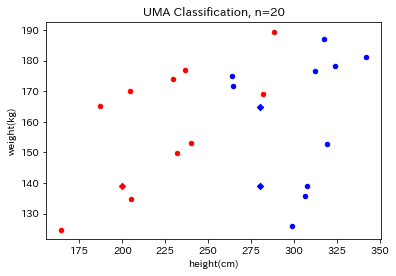

In [2]:
#k近傍法 k-nearest neighbor algorithm, k-NN

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from classification_clustering_data import * # 外部ファイルからデータ読み込み

# 説明変数Xの配列(身長, 体重)
array_explanatory_variable = UMA_X
# 目的変数の配列Y(性別:0,1)
array_response_variable = UMA_Y

# 未知Xの配列(3体のUMAの情報(身長、体重))
array_unknown = np.array([[280, 139], [200, 139], [280, 165]]) # 性別未知のUMAが3体
#見る近傍(位置の近い範囲)の数
k = 3

# ユークリッド距離を計算する関数　ピタゴラスの定理で計算
def calc_euclidean_distance(hw1, hw2):
    return np.sqrt((hw2[0]-hw1[0])**2 + (hw2[1]-hw1[1])**2)

# 既知データと全てとの距離を計算する関数(未知データの配列、既知データの配列)
def calc_distance_knowndata(array_unknown, array_known):
    #返す配列 空の配列を定義
    re_array = np.empty(0, float)
    # 既知データの何番目を見ているかカウント
    count = 0

    for known in array_known:
        # ユークリッド距離
        euclidean = calc_euclidean_distance(array_unknown, known)
        print(str(count)+" ",end="")
        print(array_unknown, known,end="")
        print("距離は"+str(euclidean),end="")
        print("ラベルは"+str(array_response_variable[count]))
        re_array = np.append(re_array, euclidean)
        count += 1
    return re_array

# 小さい方から配列の番号をk個取得
def get_k_array(arr, k):
    array_sorted = arr.argsort() # 元の配列のindex番号を返す
    return(array_sorted[0:k])

###### 分類処理 ######
# 予測したラベルの配列
predicted_label_array = np.empty(0, bool)

# 未知データの個数だけ繰り返す
for unknown in range(len(array_unknown)):
    # 既知データとの距離の配列 
    array_distance_from_knowndata = calc_distance_knowndata(array_unknown[unknown], array_explanatory_variable)
    # 多数決用ラベル
    array_majo = np.empty(0, bool)

    # 小さい方から配列の番号をk個取得
    for index in (get_k_array(array_distance_from_knowndata,k)):
        array_majo = np.append(array_majo, array_response_variable[index])
    
    # 多数決の結果
    # stats.modeの返り値の0番目が最頻値
    result_majo = stats.mode(array_majo, axis=0)[0]
    predicted_label_array = np.append(predicted_label_array, result_majo)


    print("小さい方から順に" + str(k),end="")
    print(get_k_array(array_distance_from_knowndata,k))
    print("多数決します", end="")
    print(array_majo, end="")
    print(result_majo)

result_class = predicted_label_array
print("未知データの分類結果は"+str(result_class))


##### 図の表示処理 #####

plt.figsize=(12,4)
plt.title("UMA Classification, n=20, k="+str(k))
plt.title("UMA Classification, n=20")
plt.xlabel("height(cm)")
plt.ylabel("weight(kg)")

colors=['red', 'blue']

for i in range(2):
    data = array_explanatory_variable[array_response_variable==i]
    plt.scatter(data[:,0],data[:,1],marker="o",c=colors[i],s=20)

for i in range(2):
    data = array_unknown[result_class==i]
    plt.scatter(data[:,0],data[:,1],marker="D",c=colors[i],s=20)


